In [10]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colorbar as cbar
from matplotlib.animation import FuncAnimation, PillowWriter 

In [31]:
with open('eval_results_real_sites_du2.pkl', 'rb') as f:
# with open('eval_results_hvraa.pkl', 'rb') as f:
    eval_results = pickle.load(f)

In [32]:
binHeight = 15
binWidth = 15
numItems = 10

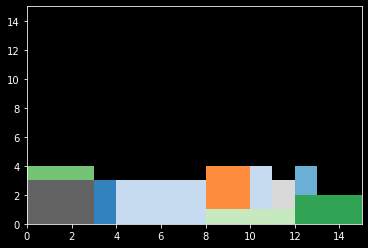

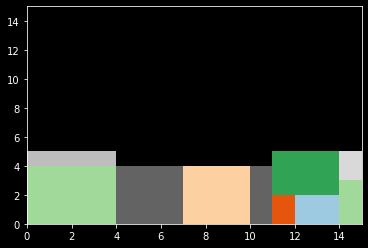

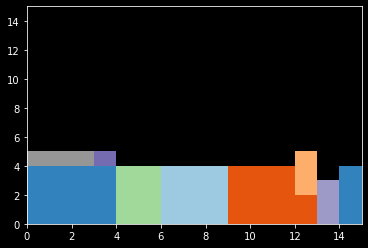

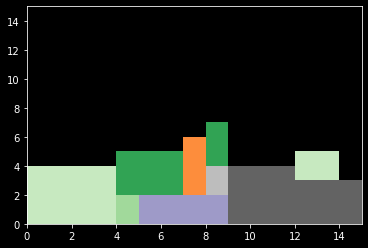

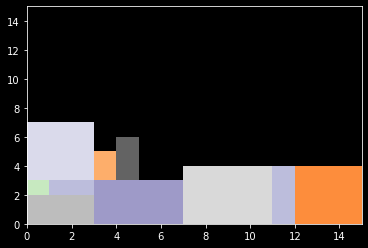

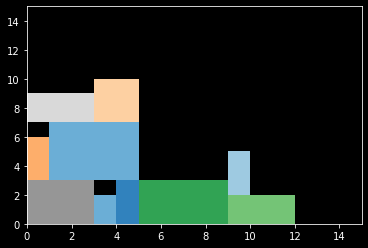

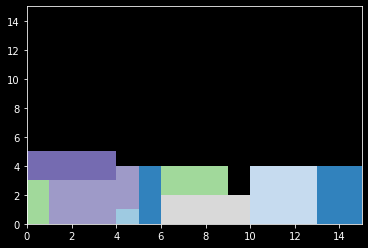

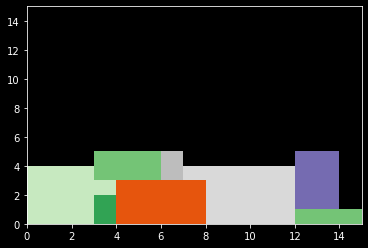

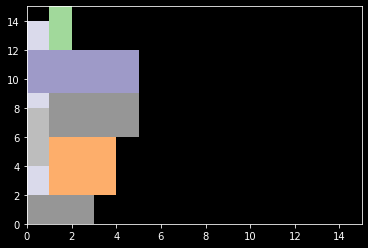

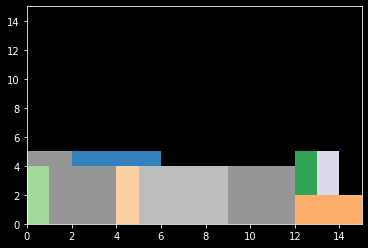

In [33]:
scores = []
for i in range(10):
    placement_info = eval_results[i]
    scores.append(placement_info['score'])
    placement_info = placement_info['placement']


    items_list = []
    for j in range(len(placement_info)):
        (x, w, h) = placement_info[j]
        items_list.append([w, h, x])

    # display
    fig,ax=plt.subplots(1)
    plt.ylim(0,binHeight)
    plt.xlim(0,binWidth)
    colors=np.random.rand(numItems)
    cmap=plt.cm.tab20c
    c=cmap(colors)

    plt.style.use('dark_background')

    # an array for bin
    bin_game = np.zeros((15, 15))

    def init():  
        ax.set_xlim(0, 15)  
        ax.set_ylim(0, 15)  

    def update(n):  
        [w, h, x] = items_list[n]
        # for #n item:
        h_ = 0
        for tt in range(binHeight):
            if sum(bin_game[tt, x:x+w]) == 0:
                bin_game[tt, x:x+w] = 1
                h_ += 1
                rect=patches.Rectangle((x, tt), w, 1,
                                        facecolor = c[n],
                                        )
                ax.add_patch(rect)
                if h_ == h:
                    break

    ani = FuncAnimation(fig, update, list(range(len(items_list))), init_func=init)  
#     plt.show()

    file = './results_gif/real_site_du2/rl_' + str(i) + '.gif'
    writer = PillowWriter(fps=2)  
    ani.save(file, writer=writer) 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

plt.style.use('dark_background')


NumOfPoints = 6
deltaT = 0.005
duration = 50
steps = int(duration / deltaT)
speed = 0.2
num = 0

CurrentXPoints = []
CurrentYPoints = []
DeltaX = np.zeros(NumOfPoints)
DeltaY = np.zeros(NumOfPoints)
MagnitudeDelta = np.zeros(NumOfPoints)
VelocityX = np.zeros(NumOfPoints)
VelocityY = np.zeros(NumOfPoints)


def update(num, AllXPoints, AllYPoints, MainLines, SightLines):
    out = []
    out.append(UpdateMain(num, AllXPoints, AllYPoints, MainLines))
    out.append(UpdateSight(num, AllXPoints, AllYPoints, SightLines))
    return out
 
def UpdateMain(num, AllXPoints, AllYPoints, MainLines):    
    for line in MainLines:
        position = MainLines.index(line)
        line.set_data([AllXPoints[i][position] for i in range(num)], [AllYPoints[i][position] for i in range(num)])
    return MainLines
        
    
    
def UpdateSight(num, AllXPoints, AllYPoints, SightLines): 
    for line in SightLines:
        position = SightLines.index(line)

        if position < (NumOfPoints-1):
            line.set_data([AllXPoints[num][position],AllXPoints[num][position+1]],
                         [AllYPoints[num][position],AllYPoints[num][position+1]])
        else:
            line.set_data([AllXPoints[num][position],AllXPoints[num][0]],
                         [AllYPoints[num][position],AllYPoints[num][0]])
    return SightLines

  
#Creates Initial Points by equally spacing the points around a polygon inscribed around circle
for i in range(0,NumOfPoints): 
    x = np.cos(((i/NumOfPoints)*2)*np.pi)
    y = np.sin(((i/NumOfPoints)*2)*np.pi)

    CurrentXPoints.append(x)
    CurrentYPoints.append(y)

AllXPoints = np.array([CurrentXPoints])
AllYPoints = np.array([CurrentYPoints])

#Fills out both AllXPoints and AllYPoints with all points in duration 
for i in range(int(steps)):
    for j in range(0,NumOfPoints-1): #Calculates deltaX and deltaY at this timestep
        DeltaX[j] = CurrentXPoints[j+1] - CurrentXPoints[j]
        DeltaY[j] = CurrentYPoints[j+1] - CurrentYPoints[j]

    DeltaX[NumOfPoints-1] = CurrentXPoints[0] - CurrentXPoints[NumOfPoints-1]
    DeltaY[NumOfPoints-1] = CurrentYPoints[0] - CurrentYPoints[NumOfPoints-1]

    for j in range(0,NumOfPoints): # calculats new X and Y Points
        MagnitudeDelta[j] = ((DeltaX[j])**2 + (DeltaY[j])**2)**(1/2)
        VelocityX[j] = speed * (DeltaX[j]/MagnitudeDelta[j])
        VelocityY[j] = speed * (DeltaY[j]/MagnitudeDelta[j])
        CurrentXPoints[j] += deltaT * VelocityX[j]
        CurrentYPoints[j] += deltaT * VelocityY[j]

    CurrentXPointsArr = np.array(CurrentXPoints)
    CurrentYPointsArr = np.array(CurrentYPoints)
    AllXPoints = np.vstack((AllXPoints,CurrentXPointsArr))
    AllYPoints = np.vstack((AllYPoints,CurrentYPointsArr))

fig = plt.figure(figsize=(5,5))
ax = plt.axes()
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

MainLines = []
SightLines= []
AllLines = MainLines + SightLines

for i in range(NumOfPoints):
    line1, = ax.plot([AllXPoints[j][i] for j in range(steps)], [AllYPoints[j][i] for j in range(steps)])
    line2, = ax.plot([AllXPoints[j][i] for j in range(steps)], [AllYPoints[j][i] for j in range(steps)])
    MainLines.append(line1)
    SightLines.append(line2)

ani = animation.FuncAnimation(fig, update, steps, fargs=[AllXPoints, AllYPoints, MainLines, SightLines], interval=1, blit=True)

plt.show()


In [ ]:
np.linspace(0, 2*np.pi, 64)

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib.animation import FuncAnimation, PillowWriter  
%matplotlib notebook  

fig, ax = plt.subplots()  
x, ysin, ycos = [], [], []  
ln1, = plt.plot([], [], 'ro')  
ln2, = plt.plot([], [], 'm*')  

def init():  
    ax.set_xlim(0, 2*np.pi)  
    ax.set_ylim(-1, 1)  
  
def update(i):  
    x.append(i)  
    ysin.append(np.sin(i))  
    ycos.append(np.cos(i))  
    ln1.set_data(x, ysin)  
    ln2.set_data(x, ycos)
    
ani = FuncAnimation(fig, update, np.linspace(0, 2*np.pi, 64), init_func=init)  
plt.show()

writer = PillowWriter(fps=25)  
ani.save("demo_sine.gif", writer=writer)  


In [ ]:
print(np.mean(scores))

In [ ]:
sum([item == max(scores) for item in scores]) / len(scores)

In [ ]:
max(scores)

In [ ]:
np.std(scores)

In [ ]:
eval_results[0]

In [ ]:
scores = []
uti_all = []
for i in range(len(eval_results)):
    placement_info = eval_results[i]
    scores.append(placement_info['score'])
    placement_info = placement_info['placement']
    items_list = []
    for j in range(len(placement_info)):
        (x, w, h) = placement_info[j]
        items_list.append([w, h, x])
    
    if len(items_list) != numItems:
        continue

    # an array for bin
    bin_game = np.zeros((15, 15))
    
    for n in range(numItems):
        [w, h, x] = items_list[n]
        # for #n item:
        h_ = 0
        for tt in range(binHeight):
            if sum(bin_game[tt, x:x+w]) == 0:
                bin_game[tt, x:x+w] = 1
                h_ += 1
                if h_ == h:
                    break

    # get mean_utilisation from bin_game

    for tt in reversed(range(15)):
        if sum(bin_game[tt,:]) != 0:
            h_max = tt+1
            break

    uti = sum(sum(bin_game)) / (h_max*15)
    uti_all.append(uti)
print(np.mean(uti_all))   

In [ ]:
for i in range(len(scores)):
    if scores[i] == 1:
        print(i)

In [ ]:
idx_sorted = np.argsort(scores)

In [ ]:
idx_sorted

In [ ]:
len(idx_sorted[-10:])

In [ ]:
aa = list(reversed(idx_sorted[-10:]))

In [ ]:
aa

In [ ]:
aa[-1] = 12

In [ ]:
aa

In [ ]:
np.mean([scores[t] for t in aa])

In [ ]:
np.mean([uti_all[t] for t in aa])

In [ ]:
[uti_all[t] for t in aa]

In [ ]:
# idx for du1: [9, 18, 17, 1, 4, 12, 8, 10, 2, 5]
# idx for du2: [19, 11, 1, 2, 6, 7, 18, 9, 13, 14]